<a href="https://colab.research.google.com/github/Syleshkumar1996/Capital-bikeshare-rental-demand/blob/main/CAPITAL_BIKESHARE_ANALYZING_BIKE_RENTAL_DEMAND_(ID_40195731).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1)Importing of required libraries**

In [ ]:
import pandas as pd
import io
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**2)Uploading of dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving dataset.xlsx to dataset (1).xlsx


In [ ]:
import io
df1=pd.read_excel(io.BytesIO(uploaded['dataset.xlsx']))
df1

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541
17462,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379
17463,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301
17464,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203


**3)Data type and Null value analysis**





In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                17466 non-null  int64  
 1   month               17466 non-null  int64  
 2   day                 17466 non-null  int64  
 3   hour                17466 non-null  int64  
 4   weekend             17466 non-null  int64  
 5   season              17466 non-null  object 
 6   temperature         17466 non-null  float64
 7   dewpoint            17466 non-null  float64
 8   humidity            17466 non-null  float64
 9   windspeed           17466 non-null  float64
 10  windgust            17466 non-null  float64
 11  pressure            17466 non-null  float64
 12  precip              17466 non-null  float64
 13  precipaccum         17466 non-null  float64
 14  weather             17466 non-null  int64  
 15  total_rentals       17466 non-null  int64  
 16  memb

In [ ]:
df1.describe()

,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,2017.246822,6.522902,15.704569,11.518321,317.602657,0.287759,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820,420.144910
std,0.662303,3.451445,8.791244,6.921848,315.397551,0.452731,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245,402.473513
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,4.000000,8.000000,6.000000,63.000000,0.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000,77.000000
50%,2017.000000,7.000000,16.000000,12.000000,244.000000,0.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000,315.500000
75%,2018.000000,10.000000,23.000000,18.000000,455.750000,1.000000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000,634.000000
max,2018.000000,12.000000,31.000000,23.000000,1639.000000,1.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000,2038.000000


**4)Additional data computation**


*  The total number of rentals initiated by non registered users is computed
*  The order of the columns is modified for convience purpose




In [ ]:
df1=df1.rename({'rental':'total_rentals'},axis=1)
df1['member_rentals']=df1['member']
df1['non_member_rentals']=df1['total_rentals']-df1['member']
df1=df1.rename({'rental':'total_rentals'},axis=1)
df1.drop(['member'],axis=1,inplace=True)
df1

,year,month,day,hour,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,total_rentals,member_rentals,non_member_rentals
0,2016,10,1,0,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103,80,23
1,2016,10,1,1,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63,53,10
2,2016,10,1,2,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33,27,6
3,2016,10,1,3,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23,20,3
4,2016,10,1,4,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,2018,9,30,19,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541,416,125
17462,2018,9,30,20,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379,278,101
17463,2018,9,30,21,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301,233,68
17464,2018,9,30,22,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203,148,55


**5)Exploratory Data analysis**



> 5.1) Impact of month on rentals






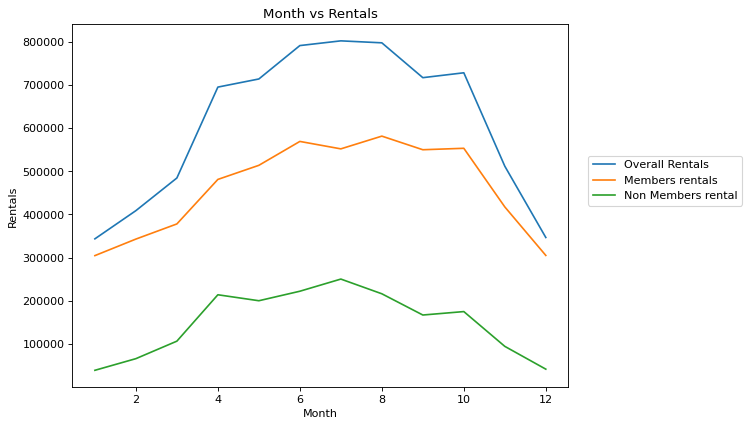

In [ ]:
df2=df1.groupby(['month']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(df2['month'],df2['total_rentals'])
plt.plot(df2['month'],df2['member_rentals'])
plt.plot(df2['month'],df2['non_member_rentals'])
plt.xlabel("Month")
plt.ylabel('Rentals')
plt.title("Month vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()



 > 5.2) Impact of day on rentals



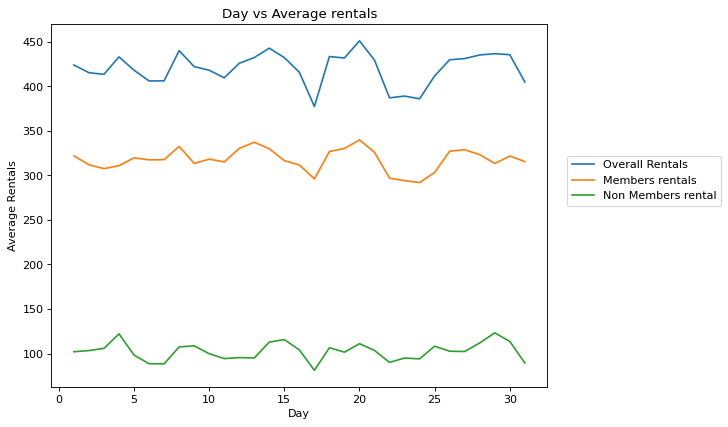

In [ ]:
df3=df1.groupby(['day']).aggregate({'total_rentals':'mean','member_rentals':'mean','non_member_rentals':'mean'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(df3['day'],df3['total_rentals'])
plt.plot(df3['day'],df3['member_rentals'])
plt.plot(df3['day'],df3['non_member_rentals'])
plt.xlabel("Day")
plt.ylabel('Average Rentals')
plt.title("Day vs Average rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()



 > 5.3) Impact of day on rentals



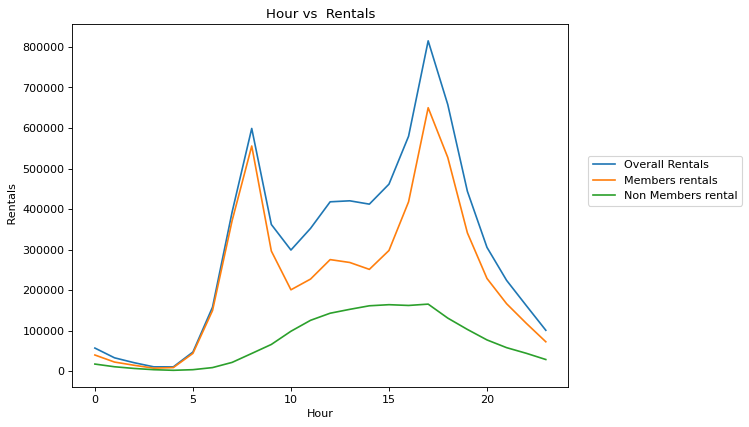

In [ ]:
df4=df1.groupby(['hour']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(df4['hour'],df4['total_rentals'])
plt.plot(df4['hour'],df4['member_rentals'])
plt.plot(df4['hour'],df4['non_member_rentals'])
plt.xlabel("Hour")
plt.ylabel(' Rentals')
plt.title("Hour vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

> 5.4) Impact of weekend on rentals

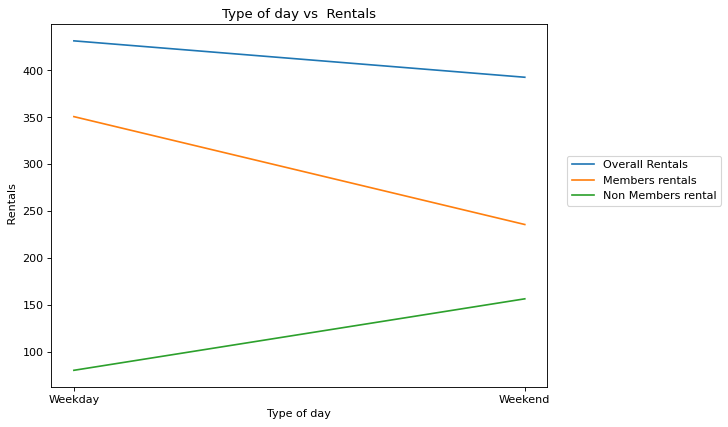

In [ ]:
df5=df1.groupby(['weekend']).aggregate({'total_rentals':'mean','member_rentals':'mean','non_member_rentals':'mean'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(["Weekday","Weekend"],df5['total_rentals'])
plt.plot(["Weekday","Weekend"],df5['member_rentals'])
plt.plot(["Weekday","Weekend"],df5['non_member_rentals'])
plt.xlabel("Type of day")
plt.ylabel(' Rentals')
plt.title("Type of day vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

 > 5.5) Impact of seasons on rentals

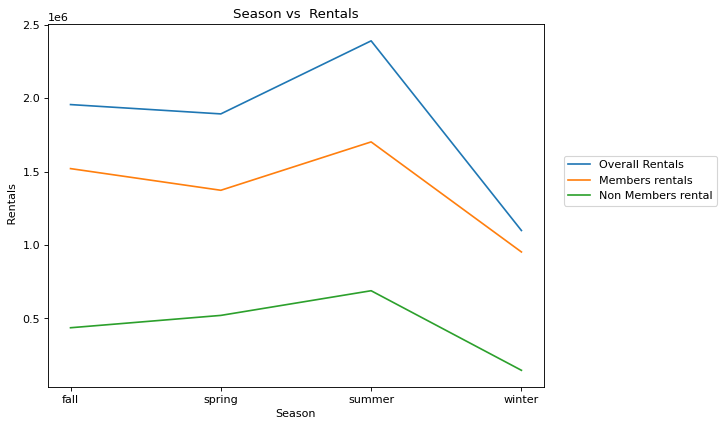

In [ ]:
df6=df1.groupby(['season']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(df6['season'],df6['total_rentals'])
plt.plot(df6['season'],df6['member_rentals'])
plt.plot(df6['season'],df6['non_member_rentals'])
plt.xlabel("Season")
plt.ylabel(' Rentals')
plt.title("Season vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

>  5.6) Impact of temperature on rentals

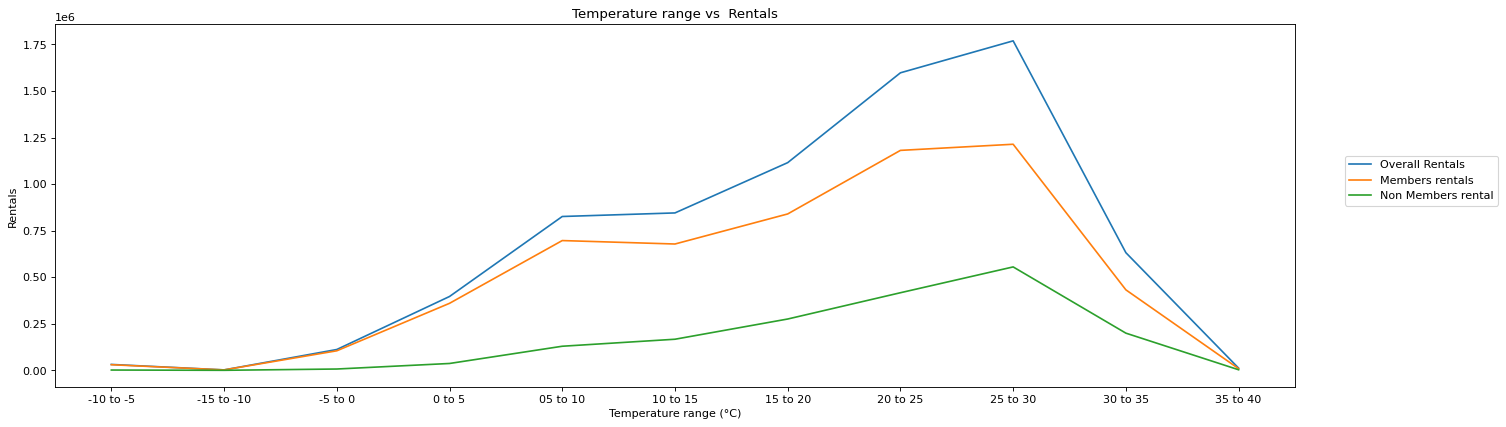

In [ ]:
df7=df1.groupby(['temperature']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
conditions_temp = [
    (df7['temperature'] > (-15)) & (df7['temperature'] <= (-10)),
    (df7['temperature'] > (-10)) & (df7['temperature'] <= (-5)),
    (df7['temperature'] > (-5)) & (df7['temperature'] <= 0),
    (df7['temperature'] > 0) & (df7['temperature'] <= 5),
    (df7['temperature'] > 5) & (df7['temperature'] <= 10),
    (df7['temperature'] > 10) & (df7['temperature'] <= 15),
    (df7['temperature'] > 15) & (df7['temperature'] <= 20),
    (df7['temperature'] > 20) & (df7['temperature'] <= 25),
    (df7['temperature'] > 25) & (df7['temperature'] <= 30),
    (df7['temperature'] > 30) & (df7['temperature'] <= 35),
    (df7['temperature'] > 35) & (df7['temperature'] <= 40)
    ]
values_temp = ['-15 to -10', '-10 to -5', '-5 to 0', '0 to 5', '05 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '30 to 35', '35 to 40']
df7['temp_range'] = np.select(conditions_temp, values_temp)
df7_1=df7.groupby(['temp_range']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df7_1['temp_range'],df7_1['total_rentals'])
plt.plot(df7_1['temp_range'],df7_1['member_rentals'])
plt.plot(df7_1['temp_range'],df7_1['non_member_rentals'])
plt.xlabel("Temperature range (°C)")
plt.ylabel('Rentals')
plt.title("Temperature range vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

> 5.7) Impact of dewpoint on rentals

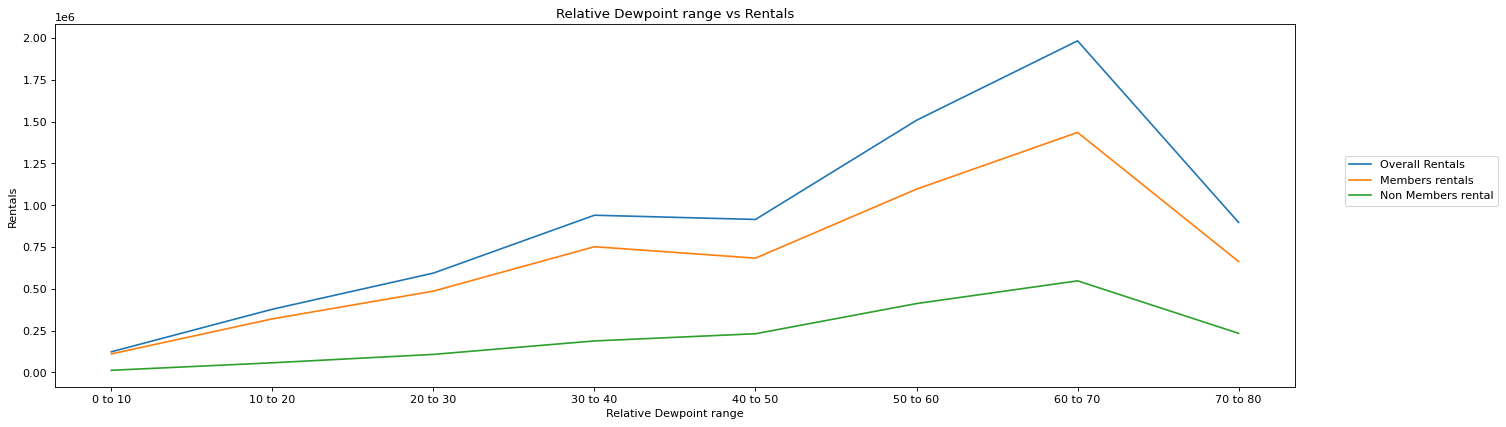

In [ ]:
df8=df1.groupby(['dewpoint']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
conditions_dewpoint = [
    (df8['dewpoint'] >= 0) & (df8['dewpoint'] <= 10),
    (df8['dewpoint'] > 10) & (df8['dewpoint'] <= 20),
    (df8['dewpoint'] > 20) & (df8['dewpoint'] <= 30),
    (df8['dewpoint'] > 30) & (df8['dewpoint'] <= 40),
    (df8['dewpoint'] > 40) & (df8['dewpoint'] <= 50),
    (df8['dewpoint'] > 50) & (df8['dewpoint'] <= 60),
    (df8['dewpoint'] > 60) & (df8['dewpoint'] <= 70),
    (df8['dewpoint'] > 70) & (df8['dewpoint'] <= 80),

    ]
values_dewpoint = ['0 to 10', '10 to 20', '20 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80']
df8['dewpoint_range'] = np.select(conditions_dewpoint, values_dewpoint)
df8_1=df8.groupby(['dewpoint_range']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df8_1['dewpoint_range'],df8_1['total_rentals'])
plt.plot(df8_1['dewpoint_range'],df8_1['member_rentals'])
plt.plot(df8_1['dewpoint_range'],df8_1['non_member_rentals'])
plt.xlabel("Relative Dewpoint range")
plt.ylabel('Rentals')
plt.title("Relative Dewpoint range vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

> 5.8) Impact of humidity on rentals

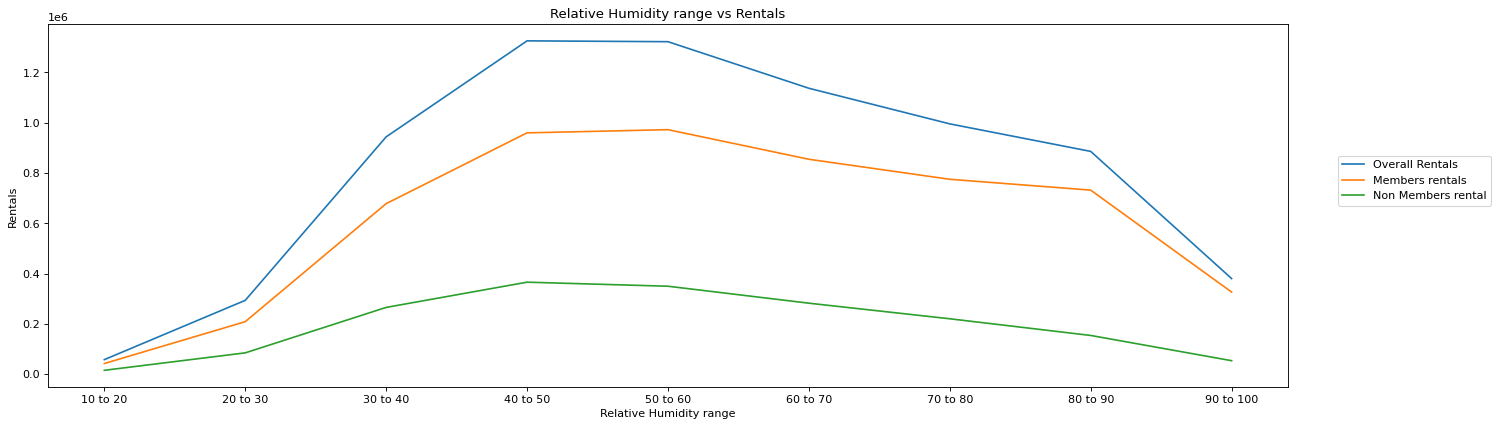

In [ ]:
df9=df1.groupby(['humidity']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
conditions_humidity = [
    (df9['humidity'] > 10) & (df9['humidity'] <= 20),
    (df9['humidity'] > 20) & (df9['humidity'] <= 30),
    (df9['humidity'] > 30) & (df9['humidity'] <= 40),
    (df9['humidity'] > 40) & (df9['humidity'] <= 50),
    (df9['humidity'] > 50) & (df9['humidity'] <= 60),
    (df9['humidity'] > 60) & (df9['humidity'] <= 70),
    (df9['humidity'] > 70) & (df9['humidity'] <= 80),
    (df9['humidity'] > 80) & (df9['humidity'] <= 90),
    (df9['humidity'] > 90) & (df9['humidity'] <= 100)

    ]
values_humidity = [ '10 to 20', '20 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80','80 to 90','90 to 100']
df9['humidity_range'] = np.select(conditions_humidity, values_humidity)
df9_1=df9.groupby(['humidity_range']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df9_1['humidity_range'],df9_1['total_rentals'])
plt.plot(df9_1['humidity_range'],df9_1['member_rentals'])
plt.plot(df9_1['humidity_range'],df9_1['non_member_rentals'])
plt.xlabel("Relative Humidity range")
plt.ylabel('Rentals')
plt.title("Relative Humidity range vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

 > 5.9) Impact of windspeed on rentals

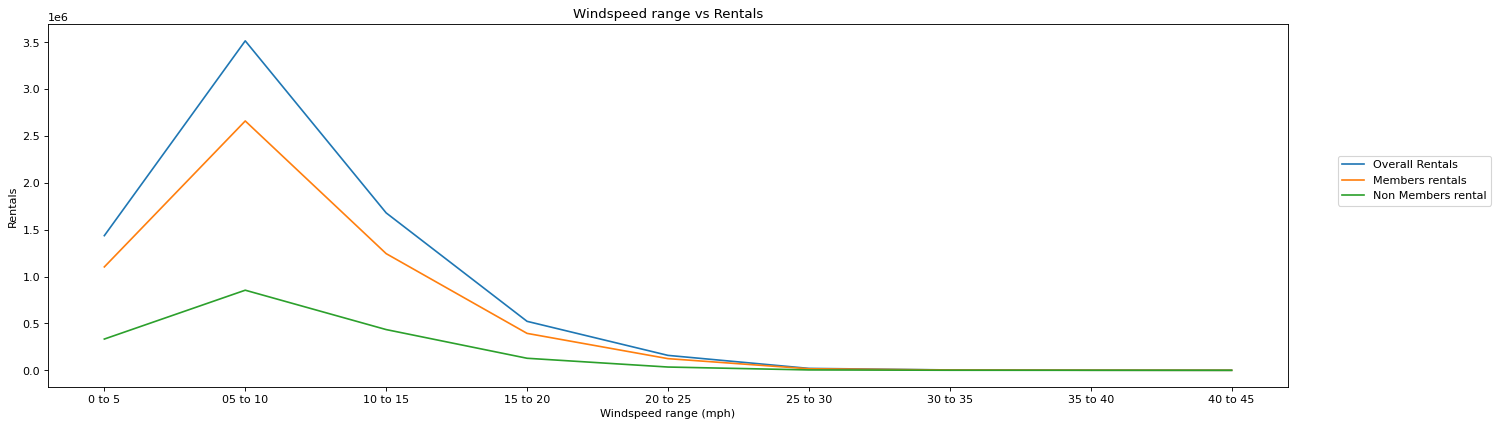

In [ ]:
df10=df1.groupby(['windspeed']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
conditions_windspeed=[
    (df10['windspeed'] >= 0) & (df10['windspeed'] <= 5),
    (df10['windspeed'] > 5) & (df10['windspeed'] <= 10),
    (df10['windspeed'] > 10) & (df10['windspeed'] <= 15),
    (df10['windspeed'] > 15) & (df10['windspeed'] <= 20),
    (df10['windspeed'] > 20) & (df10['windspeed'] <= 25),
    (df10['windspeed'] > 25) & (df10['windspeed'] <= 30),
    (df10['windspeed'] > 30) & (df10['windspeed'] <= 35),
    (df10['windspeed'] > 35) & (df10['windspeed'] <= 40),
    (df10['windspeed'] > 40) & (df10['windspeed'] <= 45),
    ]
values_windspeed = ['0 to 5', '05 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '30 to 35', '35 to 40','40 to 45']
df10['windspeed_range'] = np.select(conditions_windspeed, values_windspeed)
df10_1=df10.groupby(['windspeed_range']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df10_1['windspeed_range'],df10_1['total_rentals'])
plt.plot(df10_1['windspeed_range'],df10_1['member_rentals'])
plt.plot(df10_1['windspeed_range'],df10_1['non_member_rentals'])
plt.xlabel("Windspeed range (mph)")
plt.ylabel('Rentals')
plt.title("Windspeed range vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

 > 5.10) Impact of windgust on rentals

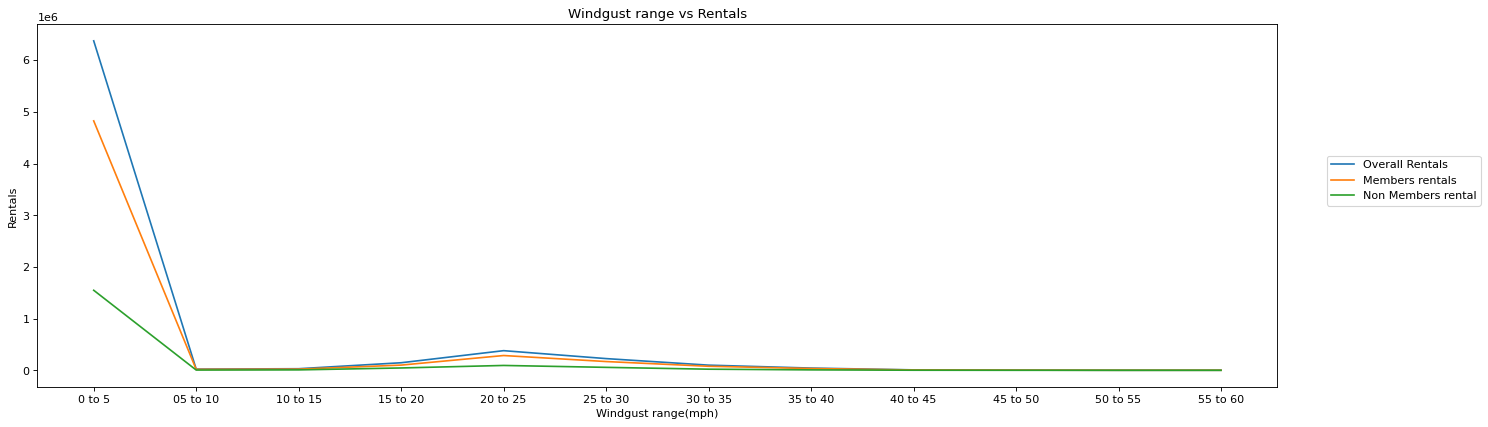

In [ ]:
df11=df1.groupby(['windgust']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
conditions_windgust=[
    (df11['windgust'] >= 0) & (df11['windgust'] <= 5),
    (df11['windgust'] > 5) & (df11['windgust'] <= 10),
    (df11['windgust'] > 10) & (df11['windgust'] <= 15),
    (df11['windgust'] > 15) & (df11['windgust'] <= 20),
    (df11['windgust'] > 20) & (df11['windgust'] <= 25),
    (df11['windgust'] > 25) & (df11['windgust'] <= 30),
    (df11['windgust'] > 30) & (df11['windgust'] <= 35),
    (df11['windgust'] > 35) & (df11['windgust'] <= 40),
    (df11['windgust'] > 40) & (df11['windgust'] <= 45),
    (df11['windgust'] > 45) & (df11['windgust'] <= 50),
    (df11['windgust'] > 50) & (df11['windgust'] <= 55),
    (df11['windgust'] > 55) & (df11['windgust'] <= 60)
    ]
values_windgust = ['0 to 5', '05 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '30 to 35', '35 to 40','40 to 45','45 to 50','50 to 55','55 to 60']
df11['windgust_range'] = np.select(conditions_windgust, values_windgust)
df11_1=df11.groupby(['windgust_range']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df11_1['windgust_range'],df11_1['total_rentals'])
plt.plot(df11_1['windgust_range'],df11_1['member_rentals'])
plt.plot(df11_1['windgust_range'],df11_1['non_member_rentals'])
plt.xlabel("Windgust range(mph)")
plt.ylabel('Rentals')
plt.title("Windgust range vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

 > 5.11) Impact of pressure on rentals

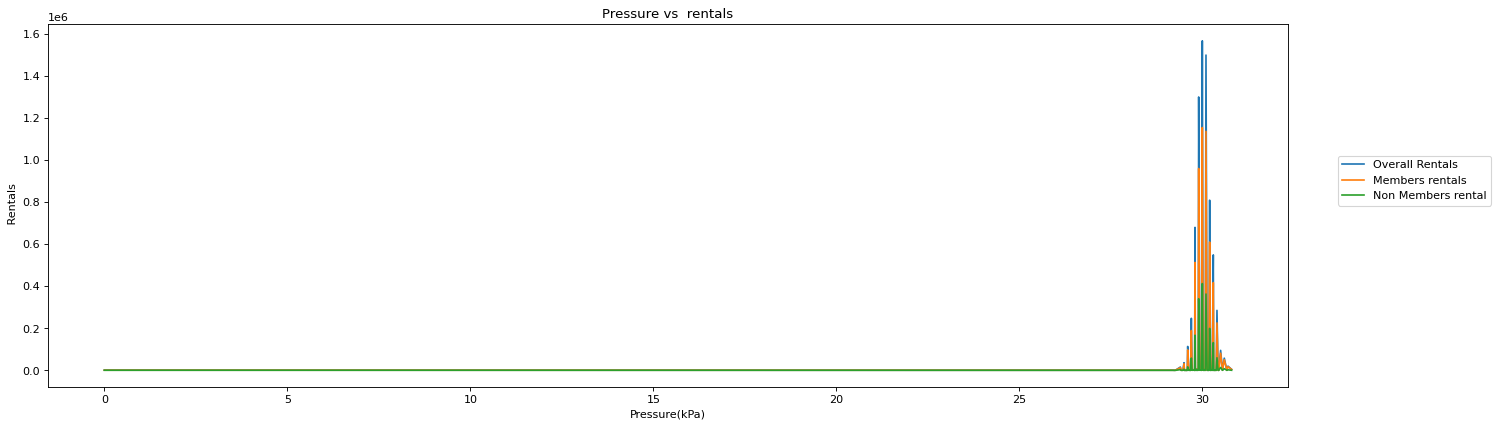

In [ ]:
df12=df1.groupby(['pressure']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df12['pressure'],df12['total_rentals'])
plt.plot(df12['pressure'],df12['member_rentals'])
plt.plot(df12['pressure'],df12['non_member_rentals'])
plt.xlabel("Pressure(kPa)")
plt.ylabel(' Rentals')
plt.title("Pressure vs  rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

 > 5.12) Impact of precipitation on rentals

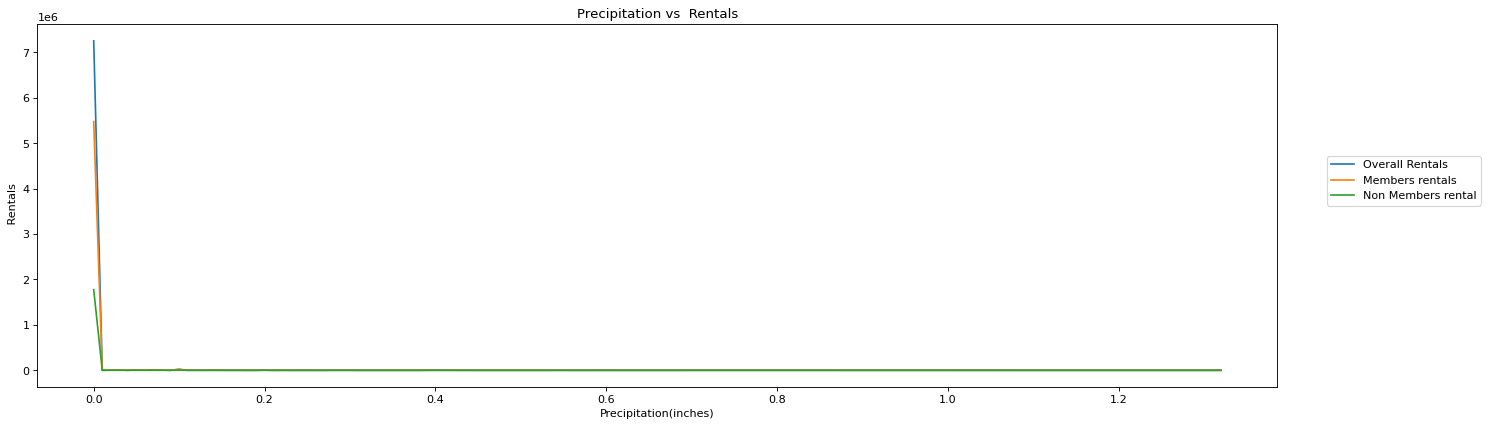

In [ ]:
df13=df1.groupby(['precip']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df13['precip'],df13['total_rentals'])
plt.plot(df13['precip'],df13['member_rentals'])
plt.plot(df13['precip'],df13['non_member_rentals'])
plt.xlabel("Precipitation(inches)")
plt.ylabel(' Rentals')
plt.title("Precipitation vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

> 5.13) Impact of precipitation accumulation on rentals

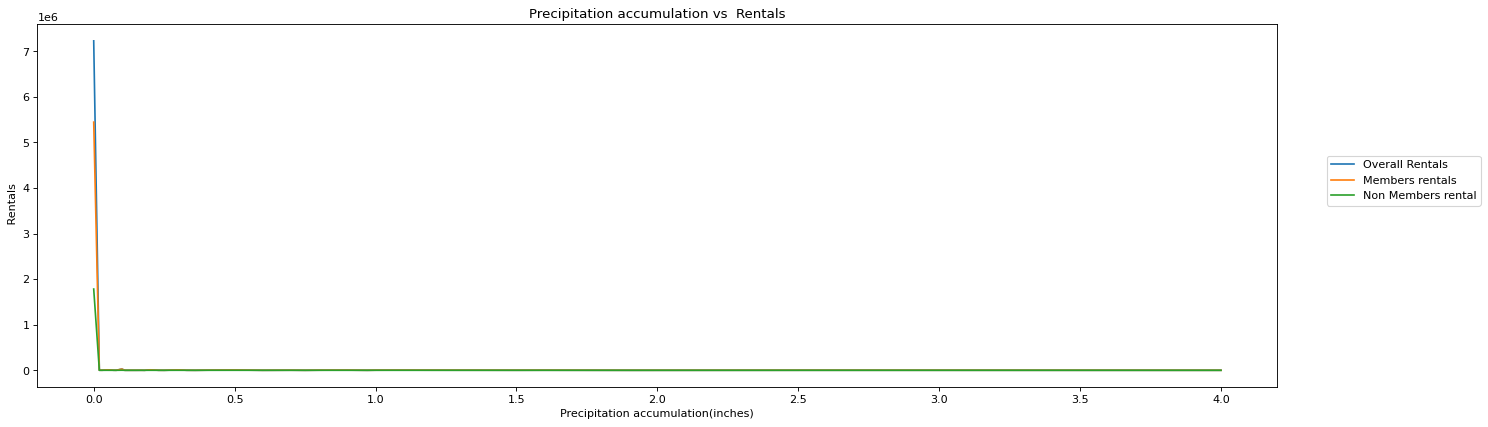

In [ ]:
df14=df1.groupby(['precipaccum']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(20, 6), dpi=80)
plt.plot(df14['precipaccum'],df14['total_rentals'])
plt.plot(df14['precipaccum'],df14['member_rentals'])
plt.plot(df14['precipaccum'],df14['non_member_rentals'])
plt.xlabel("Precipitation accumulation(inches)")
plt.ylabel(' Rentals')
plt.title("Precipitation accumulation vs  Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

> 5.14) Impact of weather on rentals

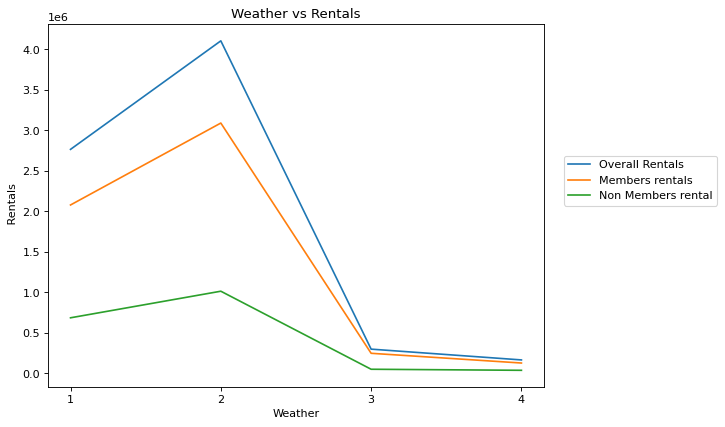

In [ ]:
df15=df1.groupby(['weather']).aggregate({'total_rentals':'sum','member_rentals':'sum','non_member_rentals':'sum'}).reset_index()
figure(figsize=(8, 6), dpi=80)
plt.plot(['1','2','3','4'],df15['total_rentals'])
plt.plot(['1','2','3','4'],df15['member_rentals'])
plt.plot(['1','2','3','4'],df15['non_member_rentals'])
plt.xlabel("Weather")
plt.ylabel(' Rentals')
plt.title("Weather vs Rentals")
plt.legend(["Overall Rentals","Members rentals","Non Members rental"],loc=(1.04,0.5))
plt.show()

**6)Feature engineering**







> 6.1)Correlation analysis


> *   The correlation between all the Nominal variables is analyzed.Since none of the pairs are strongly correlated, all the nominal variables taken into consideration for model building






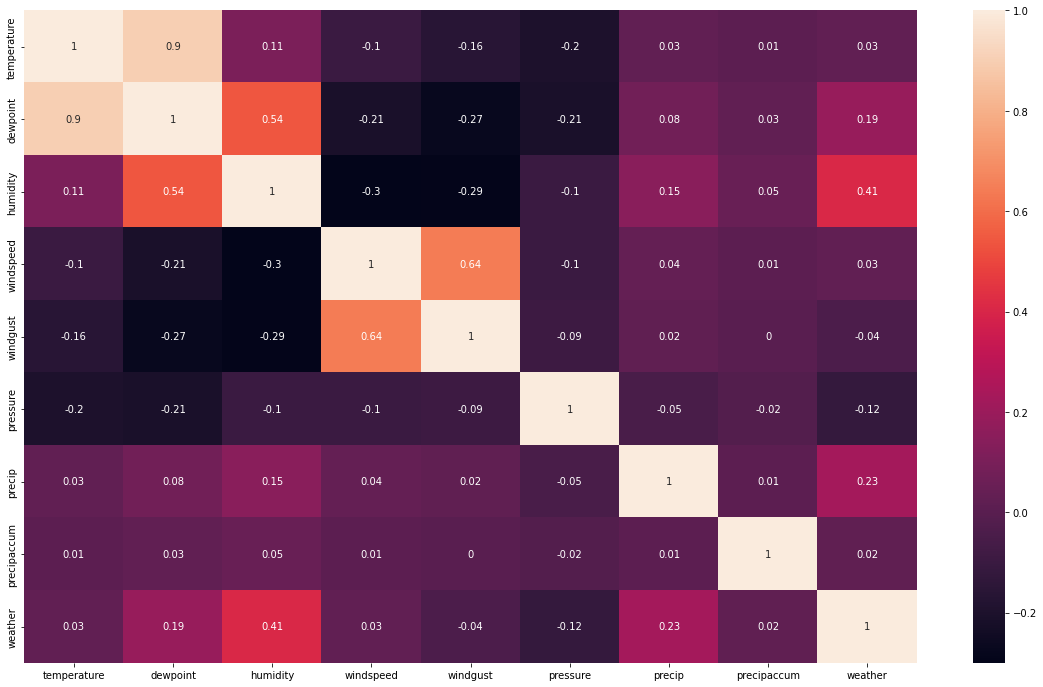

In [ ]:
import seaborn as sns
correlation_matrix=(df1.iloc[:,6:15]).corr().round(2)
plt.figure(figsize=(20,12)) 
sns.heatmap(correlation_matrix,annot=True)
plt.show()



> 6.2)Convertion of month into dummy variables







In [ ]:
month_dummies=pd.get_dummies(df1.month)
month_dummies=month_dummies.rename({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},axis=1)
df16=pd.concat([month_dummies,df1],axis='columns')
df16_1=df16.iloc[:,1:]
df16_1

,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,...,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,total_rentals,member_rentals,non_member_rentals
0,0,0,0,0,0,0,0,0,1,0,...,100.0,6.0,0.0,30.1,0.0,0.0,3,103,80,23
1,0,0,0,0,0,0,0,0,1,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,63,53,10
2,0,0,0,0,0,0,0,0,1,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,33,27,6
3,0,0,0,0,0,0,0,0,1,0,...,100.0,10.0,0.0,30.1,0.1,0.0,3,23,20,3
4,0,0,0,0,0,0,0,0,1,0,...,100.0,9.0,0.0,30.1,0.0,0.0,3,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,0,0,0,0,0,0,0,1,0,0,...,68.0,5.0,0.0,30.3,0.0,0.0,2,541,416,125
17462,0,0,0,0,0,0,0,1,0,0,...,70.0,3.0,0.0,30.3,0.0,0.0,2,379,278,101
17463,0,0,0,0,0,0,0,1,0,0,...,76.0,6.0,0.0,30.3,0.0,0.0,2,301,233,68
17464,0,0,0,0,0,0,0,1,0,0,...,84.0,8.0,0.0,30.3,0.0,0.0,2,203,148,55


> 6.3)Convertion of hour into dummy variables

In [ ]:
hour_dummies=pd.get_dummies(df16_1.hour)
hour_dummies=hour_dummies.rename({0:'00:00',1:'01:00',2:'02:00',3:'03:00',4:'04:00',5:'05:00',6:'06:00',7:'07:00',8:'08:00',9:'09:00',10:'10:00',11:'11:00',12:'12:00',13:'13:00',14:'14:00',15:'15:00',16:'16:00',17:'17:00',18:'18:00',19:'19:00',20:'20:00',21:'21:00',22:'22:00',23:'23:00'},axis=1)
df17=pd.concat([hour_dummies,df16_1],axis='columns')
df17_1=df17.iloc[:,1:]
df17_1

,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,...,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,total_rentals,member_rentals,non_member_rentals
0,0,0,0,0,0,0,0,0,0,0,...,100.0,6.0,0.0,30.1,0.0,0.0,3,103,80,23
1,1,0,0,0,0,0,0,0,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,63,53,10
2,0,1,0,0,0,0,0,0,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,33,27,6
3,0,0,1,0,0,0,0,0,0,0,...,100.0,10.0,0.0,30.1,0.1,0.0,3,23,20,3
4,0,0,0,1,0,0,0,0,0,0,...,100.0,9.0,0.0,30.1,0.0,0.0,3,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,0,0,0,0,0,0,0,0,0,0,...,68.0,5.0,0.0,30.3,0.0,0.0,2,541,416,125
17462,0,0,0,0,0,0,0,0,0,0,...,70.0,3.0,0.0,30.3,0.0,0.0,2,379,278,101
17463,0,0,0,0,0,0,0,0,0,0,...,76.0,6.0,0.0,30.3,0.0,0.0,2,301,233,68
17464,0,0,0,0,0,0,0,0,0,0,...,84.0,8.0,0.0,30.3,0.0,0.0,2,203,148,55



> 6.4)Convertion of seasons into dummy variables



In [ ]:
season_dummies=pd.get_dummies(df17_1.season)
df18=pd.concat([season_dummies,df17_1],axis='columns')
df18_1=df18.iloc[:,1:]
df18_1

,spring,summer,winter,01:00,02:00,03:00,04:00,05:00,06:00,07:00,...,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,total_rentals,member_rentals,non_member_rentals
0,0,0,0,0,0,0,0,0,0,0,...,100.0,6.0,0.0,30.1,0.0,0.0,3,103,80,23
1,0,0,0,1,0,0,0,0,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,63,53,10
2,0,0,0,0,1,0,0,0,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,33,27,6
3,0,0,0,0,0,1,0,0,0,0,...,100.0,10.0,0.0,30.1,0.1,0.0,3,23,20,3
4,0,0,0,0,0,0,1,0,0,0,...,100.0,9.0,0.0,30.1,0.0,0.0,3,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,0,0,0,0,0,0,0,0,0,0,...,68.0,5.0,0.0,30.3,0.0,0.0,2,541,416,125
17462,0,0,0,0,0,0,0,0,0,0,...,70.0,3.0,0.0,30.3,0.0,0.0,2,379,278,101
17463,0,0,0,0,0,0,0,0,0,0,...,76.0,6.0,0.0,30.3,0.0,0.0,2,301,233,68
17464,0,0,0,0,0,0,0,0,0,0,...,84.0,8.0,0.0,30.3,0.0,0.0,2,203,148,55




> 6.5)Convertion of weather into dummy variables



In [ ]:
weather_dummies=pd.get_dummies(df18_1.weather)
weather_dummies=weather_dummies.rename({1:'w1',2:'w2',3:'w3',4:'w4'},axis=1)
df19=pd.concat([weather_dummies,df18_1],axis=1)
df19_1=df19.iloc[:,1:]
df19_1

,w2,w3,w4,spring,summer,winter,01:00,02:00,03:00,04:00,...,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,total_rentals,member_rentals,non_member_rentals
0,0,1,0,0,0,0,0,0,0,0,...,100.0,6.0,0.0,30.1,0.0,0.0,3,103,80,23
1,0,1,0,0,0,0,1,0,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,63,53,10
2,0,1,0,0,0,0,0,1,0,0,...,100.0,10.0,0.0,30.1,0.0,0.0,3,33,27,6
3,0,1,0,0,0,0,0,0,1,0,...,100.0,10.0,0.0,30.1,0.1,0.0,3,23,20,3
4,0,1,0,0,0,0,0,0,0,1,...,100.0,9.0,0.0,30.1,0.0,0.0,3,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,1,0,0,0,0,0,0,0,0,0,...,68.0,5.0,0.0,30.3,0.0,0.0,2,541,416,125
17462,1,0,0,0,0,0,0,0,0,0,...,70.0,3.0,0.0,30.3,0.0,0.0,2,379,278,101
17463,1,0,0,0,0,0,0,0,0,0,...,76.0,6.0,0.0,30.3,0.0,0.0,2,301,233,68
17464,1,0,0,0,0,0,0,0,0,0,...,84.0,8.0,0.0,30.3,0.0,0.0,2,203,148,55





>6.6)Feature selection



  > * The categorical variables are no longer required due to the presence of dummy variables
   > *The feature "year" is not taken into consideration for building the *model*







In [ ]:
df20=df19_1.drop(['month','day','year','hour','weather','season'],axis=1)
df20

,w2,w3,w4,spring,summer,winter,01:00,02:00,03:00,04:00,...,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,total_rentals,member_rentals,non_member_rentals
0,0,1,0,0,0,0,0,0,0,0,...,65.0,100.0,6.0,0.0,30.1,0.0,0.0,103,80,23
1,0,1,0,0,0,0,1,0,0,0,...,64.0,100.0,10.0,0.0,30.1,0.0,0.0,63,53,10
2,0,1,0,0,0,0,0,1,0,0,...,64.0,100.0,10.0,0.0,30.1,0.0,0.0,33,27,6
3,0,1,0,0,0,0,0,0,1,0,...,64.0,100.0,10.0,0.0,30.1,0.1,0.0,23,20,3
4,0,1,0,0,0,0,0,0,0,1,...,64.0,100.0,9.0,0.0,30.1,0.0,0.0,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,1,0,0,0,0,0,0,0,0,0,...,60.0,68.0,5.0,0.0,30.3,0.0,0.0,541,416,125
17462,1,0,0,0,0,0,0,0,0,0,...,61.0,70.0,3.0,0.0,30.3,0.0,0.0,379,278,101
17463,1,0,0,0,0,0,0,0,0,0,...,62.0,76.0,6.0,0.0,30.3,0.0,0.0,301,233,68
17464,1,0,0,0,0,0,0,0,0,0,...,63.0,84.0,8.0,0.0,30.3,0.0,0.0,203,148,55




> 6.7)Generation of polynomial features



In [ ]:
df_x=df20.iloc[:,:49]
df_x

,w2,w3,w4,spring,summer,winter,01:00,02:00,03:00,04:00,...,Dec,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum
0,0,1,0,0,0,0,0,0,0,0,...,0,1,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0
2,0,1,0,0,0,0,0,1,0,0,...,0,1,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,1,0,0,0,0,0,0,0,0,0,...,0,1,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0
17462,1,0,0,0,0,0,0,0,0,0,...,0,1,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0
17463,1,0,0,0,0,0,0,0,0,0,...,0,1,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0
17464,1,0,0,0,0,0,0,0,0,0,...,0,1,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0


In [ ]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
input_features = polynomial.fit_transform(df_x)

**7)Model building**

In [ ]:
model=linear_model.LinearRegression()



> 7.1)Validating the accuracy of overall rental predications



In [ ]:
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(input_features,df20['total_rentals'],test_size=0.2)
model.fit(X_train_total,y_train_total)
prediction_total=model.predict(X_test_total)
r2_total=r2_score(y_test_total,prediction_total)
mae_total=mean_absolute_error(y_test_total,prediction_total)
mse_total = mean_squared_error(y_test_total,prediction_total)
rmse_total=mean_squared_error(y_test_total,prediction_total,squared=False)
print('R-square for total rentals prediction is ', r2_total)
print('Mean Absolute Error for total rentals prediction is ', mae_total)

R-square for total rentals prediction is  0.9079272311484595
Mean Absolute Error for total rentals prediction is  80.09501671642893


> 7.2)Validating the accuracy of member rental predications

In [ ]:
X_train_member, X_test_member, y_train_member, y_test_member = train_test_split(input_features,df20['member_rentals'],test_size=0.2)
model.fit(X_train_member,y_train_member)
prediction_member=model.predict(X_test_member)
r2_member=r2_score(y_test_member,prediction_member)
mae_member=mean_absolute_error(y_test_member,prediction_member)
print('R-square for member rentals prediction is ', r2_member)
print('Mean Absolute Error for member rentals prediction is ', mae_member)

R-square for member rentals prediction is  0.9111769914011292
Mean Absolute Error for member rentals prediction is  59.82997156258119


> 7.3)Validating the accuracy of non-member rental predications

In [ ]:
X_train_non_member, X_test_non_member, y_train_non_member, y_test_non_member = train_test_split(input_features,df20['non_member_rentals'],test_size=0.2)
model.fit(X_train_non_member,y_train_non_member)
prediction_non_member=model.predict(X_test_non_member)
r2_non_member=r2_score(y_test_non_member,prediction_non_member)
mae_non_member=mean_absolute_error(y_test_non_member,prediction_non_member)
print('R-square for non_member rentals prediction is ', r2_non_member)
print('Mean Absolute Error for non_member rentals prediction is ', mae_non_member)

R-square for non_member rentals prediction is  0.8331436188761956
Mean Absolute Error for non_member rentals prediction is  35.21926479305941
